<a href="https://colab.research.google.com/github/Singhrahul2511/Deep_Learning_All_exp/blob/main/DL_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

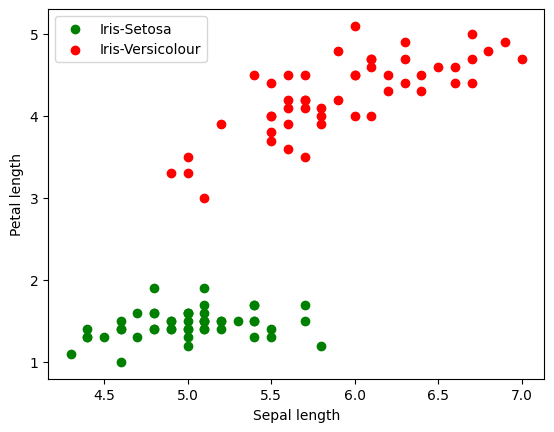

Epoch 1
Output: [1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1]
Error: 0.0
Weights: [-0.45379848  0.05715507  0.63562096 -0.05898852]
Bias: 1.0
Epoch 2
Output: [1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1]
Error: 0.0
Weights: [-0.45379848  0.05715507  0.63562096 -0.05898852]
Bias: 1.0
Epoch 3
Output: [1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1]
Error: 0.0
Weights: [-0.45379848  0.05715507  0.63562096 -0.05898852]
Bias: 1.0
Epoch 4
Output: [1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1]
Error: 0.0
Weights: [-0.45379848  0.0571

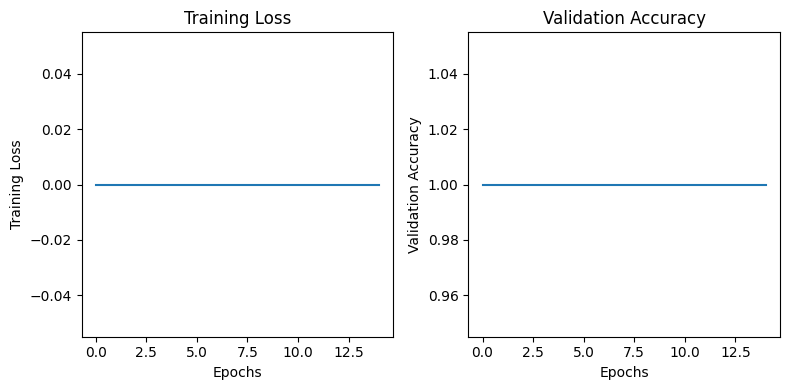

In [ ]:
# Import the libraries and dataset
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Seed for reproducibility
SEED = 2017

# Load the Iris Plants Database from sklearn.datasets
iris = load_iris()
idxs = np.where(iris.target < 2)  # The first two classes (Iris-Setosa and Iris-Versicolour) are linear separable
X = iris.data[idxs]
y = iris.target[idxs]

# Let's plot the data for two of the four variables
plt.scatter(X[y==0][:,0], X[y==0][:,2], color='green', label='Iris-Setosa')
plt.scatter(X[y==1][:,0], X[y==1][:,2], color='red', label='Iris-Versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Initialize the weights and the bias for the perceptron
weights = np.random.normal(size=X_train.shape[1])
bias = 1

# Define the hyperparameters
learning_rate = 0.1
n_epochs = 15

# Arrays to store the history of loss and accuracy
hist_loss = []
hist_accuracy = []

# Start training the perceptron
for epoch in range(n_epochs):
    # Apply the perceptron function
    output = np.where((X_train.dot(weights) + bias) > 0.5, 1, 0)
    print(f'Epoch {epoch + 1}')
    print(f'Output: {output}')

    # Compute MSE (Mean Squared Error)
    error = np.mean((y_train - output) ** 2)
    print("Error:", error)

    # Update weights and bias
    weights -= learning_rate * np.dot((output - y_train), X_train)
    bias -= learning_rate * np.sum(output - y_train)

    print("Weights:", weights)
    print("Bias:", bias)

    # Calculate and save training loss
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)

    # Calculate validation accuracy
    output_val = np.where((X_val.dot(weights) + bias) > 0.5, 1, 0)
    accuracy = np.mean(y_val == output_val)
    hist_accuracy.append(accuracy)

# Plot the training loss and validation accuracy
fig = plt.figure(figsize=(8, 4))

a = fig.add_subplot(1, 2, 1)
plt.plot(hist_loss)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
a.set_title('Training Loss')

a = fig.add_subplot(1, 2, 2)
plt.plot(hist_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
a.set_title('Validation Accuracy')

plt.tight_layout()
plt.show()
